In [26]:
%matplotlib inline

In [27]:
# Import dependencies.
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
file = 'ETL/model_dataset_cleaned.csv'
df = pd.read_csv(file)
df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,population,gdp_per_capita,dob_converted,age,total_medals,placed
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,4.641827e+07,25831.582305,2069-10-17,46,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,5.061704e+07,27221.524051,1986-09-23,29,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,3.585177e+07,43248.529909,1992-05-27,24,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,3.554150e+06,1848.061804,1991-01-02,25,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,4.595700e+06,37807.967276,1990-11-26,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,801825063,Zurabi Iakobishvili,GEO,male,2/4/92,1.71,68.0,wrestling,0,0,0,3.679000e+06,3795.973308,1992-02-04,24,0,0
10105,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0,1.055122e+07,17548.338213,1986-12-19,29,0,0
10106,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0,1.371220e+09,8027.683810,1991-05-14,25,0,0
10107,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0,9.170380e+07,2111.138024,1989-04-05,27,0,0


In [83]:
country_medals = df.groupby(df["nationality"]).sum()["total_medals"]

In [84]:
country_medals.sort_values(ascending=False)

nationality
USA    258
GER    159
GBR    141
CHN    109
RUS    107
      ... 
MLT      0
MOZ      0
MRI      0
MYA      0
AFG      0
Name: total_medals, Length: 165, dtype: int64

In [85]:
file = 'countries.csv'
countries_df = pd.read_csv(file)
countries_df

,country,code,population,gdp_per_capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [16]:
countries_df.dropna(inplace=True)

In [86]:
countries_df = countries_df.rename(columns={'code': 'nationality'})
combined_df = pd.merge(countries_df,country_medals, on="nationality")

In [87]:
combined_df.sort_values("total_medals",ascending=False)

,country,nationality,population,gdp_per_capita,total_medals
157,United States,USA,3.214188e+08,56115.718426,258
59,Germany,GER,8.141314e+07,41313.313995,159
156,United Kingdom,GBR,6.513823e+07,43875.969614,141
34,China,CHN,1.371220e+09,8027.683810,109
124,Russia,RUS,1.440968e+08,9092.580536,107
...,...,...,...,...,...
64,Guinea,GUI,1.260859e+07,531.320595,0
63,Guatemala,GUA,1.634290e+07,3903.478856,0
62,Grenada,GRN,1.068250e+05,9212.020352,0
60,Ghana,GHA,2.740989e+07,1369.701122,0


Text(0, 0.5, 'Total Medals')

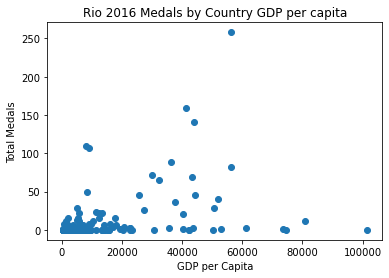

In [42]:
#scatterplot of gdp per capita and total medals to see it's relationship 
x_axis=combined_df["gdp_per_capita"]
y_axis=combined_df["total_medals"]
plt.plot(x_axis, y_axis, 'o')

plt.title("Rio 2016 Medals by Country GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Medals")

In [29]:
#looks like there are a couple of outliers to the far right, what countries are those? 
combined_df.sort_values("gdp_per_capita",ascending=False)

,country,nationality,population,gdp_per_capita,total_medals
90,Luxembourg,LUX,569676.0,101449.968168,0
145,Switzerland,SUI,8286976.0,80945.079219,11
113,Norway,NOR,5195921.0,74400.369777,0
123,Qatar,QAT,2235355.0,73653.394435,1
75,Ireland,IRL,4640703.0,61133.672427,3
...,...,...,...,...,...
92,Madagascar,MAD,24235390.0,401.836006,0
93,Malawi,MAW,17215232.0,371.985748,0
111,Niger,NIG,19899120.0,358.958152,1
31,Central African Republic,CAF,4900274.0,323.201674,0


In [41]:
#calculating pearson correlation coefficient on gdp per capita and total medals 
import scipy as sp
from scipy import stats
pearson = sp.stats.pearsonr(combined_df["gdp_per_capita"], combined_df["total_medals"])
pearson 

(0.3715505387264822, 8.950229806165898e-07)

In [100]:
#funnction to return a summary country medal count dataframe for a particular sport category 
def filterbysport(sport):
    sport_df = df[df["sport"] == sport]
    medal_counts = sport_df.groupby(df["nationality"]).sum()["total_medals"]
    summary_df = pd.merge(countries_df,medal_counts, on="nationality")
    
    return summary_df

In [101]:
#country performance for cycling 
cycling_df = filterbysport("cycling")
cycling_df.sort_values("total_medals",ascending=False)

,country,nationality,population,gdp_per_capita,total_medals
63,United Kingdom,GBR,65138232.0,43875.969614,20
64,United States,USA,321418820.0,56115.718426,8
18,Denmark,DEN,5676002.0,51989.293471,7
2,Australia,AUS,23781169.0,56310.962993,6
46,Netherlands,NED,16936520.0,44299.768085,6
...,...,...,...,...,...
31,Indonesia,INA,257563815.0,3346.487039,0
1,Argentina,ARG,43416755.0,13431.878340,0
33,Israel,ISR,8380400.0,35728.093495,0
35,Japan,JPN,126958472.0,32477.215145,0


In [90]:
#defining a function to show GDP per capita and medal counts for a given dataframe 
def GDPscatterplot(df,sport):
    x_axis=df["gdp_per_capita"]
    y_axis=df["total_medals"]
    
    plt.title(f"Rio 2016 {sport} Medals by Country GDP per Capita")
    plt.xlabel("GDP per Capita")
    plt.ylabel("Total Medals")
    
    return plt.plot(x_axis, y_axis, 'o')

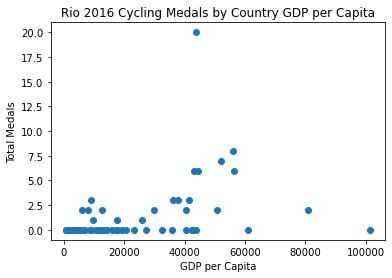

In [92]:
GDPscatterplot(cycling_df,"Cycling")

In [125]:
#creates a summary view of the pearson correlation and the scatter plot 
def sportsummary(sport):
    sport_summary_df=filterbysport(sport)
    
    s_pearson = sp.stats.pearsonr(sport_summary_df["gdp_per_capita"], sport_summary_df["total_medals"])
    
    return GDPscatterplot(sport_summary_df,sport), sport_summary_df.sort_values("total_medals",ascending=False).head(),print(f"Pearson correlation between GDP per capita and Olympic medals  for {sport}: {s_pearson}")

Pearson correlation between GDP per capita and Olympic medals  for athletics: (0.21267276747902714, 0.008748921898022805)


([<matplotlib.lines.Line2D at 0x22afca72c48>],
             country nationality   population  gdp_per_capita  total_medals
 144   United States         USA  321418820.0    56115.718426            45
 73          Jamaica         JAM    2725941.0     5232.024583            28
 143  United Kingdom         GBR   65138232.0    43875.969614            14
 77            Kenya         KEN   46050302.0     1376.712829            12
 27           Canada         CAN   35851774.0    43248.529909            10,
 None)

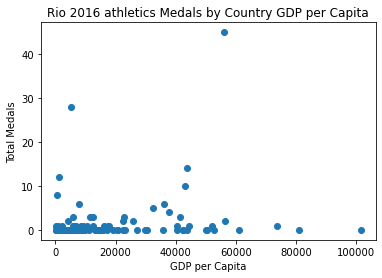

In [126]:
#Athletics Summary Table 
sportsummary("athletics")

Pearson correlation between GDP per capita and Olympic medals  for taekwondo: (0.06904070575387916, 0.6232669136794392)


([<matplotlib.lines.Line2D at 0x22afde3a208>],
            country nationality    population  gdp_per_capita  total_medals
 27    Korea, South         KOR  5.061704e+07    27221.524051             5
 50  United Kingdom         GBR  6.513823e+07    43875.969614             3
 1       Azerbaijan         AZE  9.651349e+06     5496.344640             3
 10           China         CHN  1.371220e+09     8027.683810             2
 44           Spain         ESP  4.641827e+07    25831.582305             2,
 None)

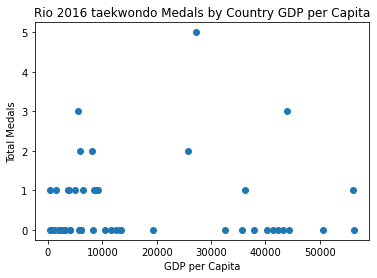

In [127]:
#What About Taekwondo?
sportsummary("taekwondo")

Pearson correlation between GDP per capita and Olympic medals  for table tennis: (-0.0027634079643967645, 0.9856261902692557)


([<matplotlib.lines.Line2D at 0x22afdf30f88>],
       country nationality    population  gdp_per_capita  total_medals
 5       China         CHN  1.371220e+09     8027.683810            10
 19      Japan         JPN  1.269585e+08    32477.215145             7
 14    Germany         GER  8.141314e+07    41313.313995             6
 0   Australia         AUS  2.378117e+07    56310.962993             0
 33  Singapore         SIN  5.535002e+06    52888.744672             0,
 None)

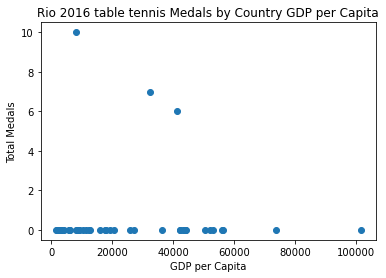

In [132]:
#table tennis
sportsummary("table tennis")

Pearson correlation between GDP per capita and Olympic medals  for rowing: (0.4755440871065394, 0.00016162581880347864)


([<matplotlib.lines.Line2D at 0x22afdf7af08>],
            country nationality   population  gdp_per_capita  total_medals
 51  United Kingdom         GBR   65138232.0    43875.969614            26
 21         Germany         GER   81413145.0    41313.313995            17
 35     Netherlands         NED   16936520.0    44299.768085            15
 52   United States         USA  321418820.0    56115.718426            10
 3        Australia         AUS   23781169.0    56310.962993             9,
 None)

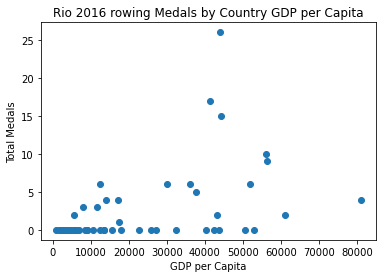

In [133]:
#table tennis
sportsummary("rowing")